In [37]:
from msmbuilder.msm import MarkovStateModel
from msmbuilder.featurizer import DihedralFeaturizer
from msmbuilder.featurizer import RawPositionsFeaturizer
from msmbuilder.decomposition import tICA
from msmbuilder.dataset import dataset
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats.distributions import randint
from msmbuilder.cluster import MiniBatchKMeans
import matplotlib.pyplot as pp
import numpy as np
from mdtraj.utils import timing
import mdtraj as md
%matplotlib inline
from matplotlib import pyplot as plt

In [38]:
with timing("Loading alanine as dataset..."):
    xyz_ala = dataset("/Users/je714/msmbuilder_data/alanine_dipeptide/*.dcd",
                      topology="/Users/je714/msmbuilder_data/alanine_dipeptide/ala2.pdb")

Loading alanine as dataset...: 0.002 seconds


In [39]:
dihed_feat = DihedralFeaturizer(types=['phi', 'psi'])
diheds = dihed_feat.fit_transform(xyz_ala)

In [43]:
rawpos_feat = RawPositionsFeaturizer()
rawpos = rawpos_feat.fit_transform(xyz_ala)

In [60]:
tica_model = tICA(n_components=4)
tica_trajs_diheds = tica_model.fit_transform(diheds)
tica_trajs_rawpos = tica_model.fit_transform(rawpos)

In [61]:
def plot_tica(tica_traj):
    txx = np.concatenate(tica_traj)
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1)
    plt.xlabel('tIC 1')
    plt.ylabel('tIC 2')
    cb = plt.colorbar()
    cb.set_label('log10(N)')
    plt.subplot(1, 2, 2)
    plt.hexbin(txx[:,2], txx[:,3], bins='log', mincnt=1)
    plt.xlabel('tIC 3')
    plt.ylabel('tIC 4')
    cb = plt.colorbar()
    cb.set_label('log10(N)')
    plt.tight_layout()

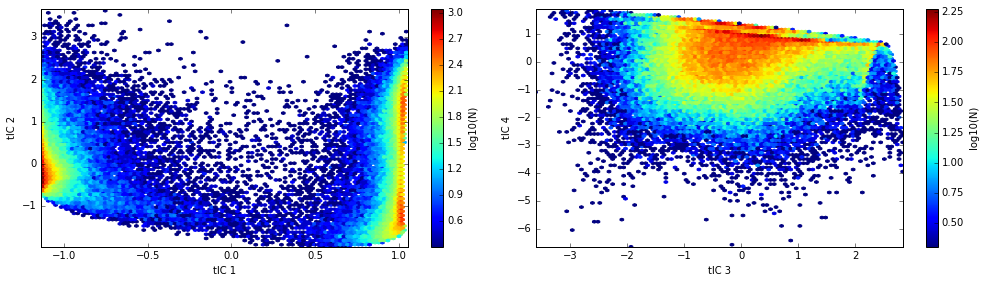

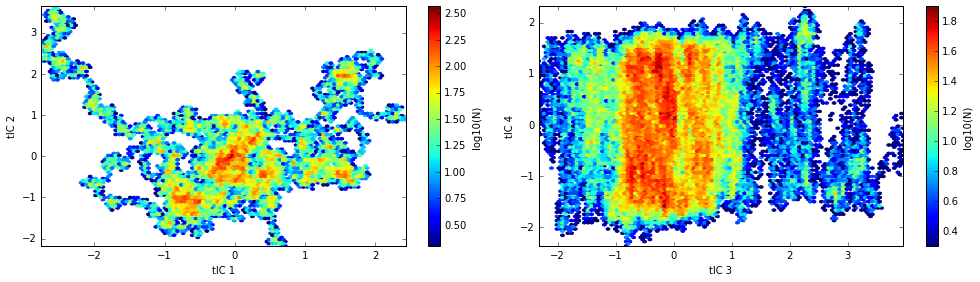

In [106]:
plot_tica(tica_trajs_diheds)
plot_tica(tica_trajs_rawpos)

In [109]:
clusterer = MiniBatchKMeans(n_clusters=500)
clustered_trajs_diheds = clusterer.fit_transform(tica_trajs_diheds)

/Users/je714/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1300: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  init_size=init_size)
